In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
url = '/Users/G/Desktop/Documents/Formazione in Data Science/WBS/Bootcamp/6. Unsupervised Machine Learning/Data/df_audio_features_5000'

songs = pd.read_csv(url)  # index_col=['name', 'artist']


# Display the DataFrame

songs.columns = songs.columns.str.replace(' ', '')
songs = songs.set_index(['name', 'artist'])
songs.head()
#songs.info()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
name,artist,,,,,,,,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,11,-13.141,0,0.0705,0.694,0.000059,0.975,0.306,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,2,-12.646,1,0.0346,0.217,0.000002,0.107,0.693,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,2,-11.048,1,0.3470,0.453,0.000063,0.124,0.905,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Mulher Eu Sei,Chico César,0.705,0.0502,4,-18.115,1,0.0471,0.879,0.000041,0.386,0.524,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Rosa Morena,Kurt Elling,0.651,0.1190,6,-19.807,1,0.0380,0.916,0.000343,0.104,0.402,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...


In [2]:
# make a copy to work in
songs_copy = songs.copy()
# droping id & html because they are strings
songs_copy.drop(['id', 'html', 'type', 'mode', 'key',
                'duration_ms', 'time_signature'], axis=1, inplace=True)
#songs_copy.info()

## Data scaling

In [3]:
# everything in one line:
# songs_scaled = MinMaxScaler().set_output(transform='pandas').fit_transform(songs)


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import set_config

song_scaler = MinMaxScaler().set_output(transform='pandas')
# fit = it learns mins and maxs
song_scaler.fit(songs_copy)

# now the datasaet will be created
songs_scaled = song_scaler.transform(songs_copy)
songs_scaled.head()


,,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.680455,0.2590,0.763897,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.767322,0.3990,0.771967,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.880041,0.7300,0.798018,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862
Mulher Eu Sei,Chico César,0.729059,0.0502,0.682811,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098
Rosa Morena,Kurt Elling,0.673216,0.1190,0.655228,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171


###  Pairwise distances

In [5]:
songs_dist = pd.DataFrame(pairwise_distances(songs_scaled),
                          index=songs_scaled.index,
                          columns=songs_scaled.index)
#songs_dist


# Features customization
Below we remove some features that are not relevant for the cluster analaysis

## Checking Correlation between the features


In [6]:
import pandas as pd

# using songs_scaled to check the correlation between each of the features
songs_corr = songs_scaled.corr()

# Create a new dataframe with the same structure as the original dataframe
# songs_corr_true = songs_corr.applymap(lambda x: 0.7 < x < 1)
songs_corr_true = songs_corr.applymap(
    lambda x: (-1 < x <= -0.67) or (0.67 <= x < 1))

# Display the new dataframe
#print(songs_corr_true)

true_count = songs_corr_true.astype(bool).sum().sum()

# Iterating over each row and column of the dataframe
for row in songs_corr_true.index:
    for column in songs_corr_true.columns:
        if songs_corr_true.loc[row, column] == True:
            print(f"Position ({row}, {column}) is True.")

Position (danceability, valence) is True.
Position (energy, loudness) is True.
Position (energy, acousticness) is True.
Position (loudness, energy) is True.
Position (loudness, acousticness) is True.
Position (acousticness, energy) is True.
Position (acousticness, loudness) is True.
Position (valence, danceability) is True.


## Plot the feature pairs with strong correlation (Abs[correlation]> 0.67)


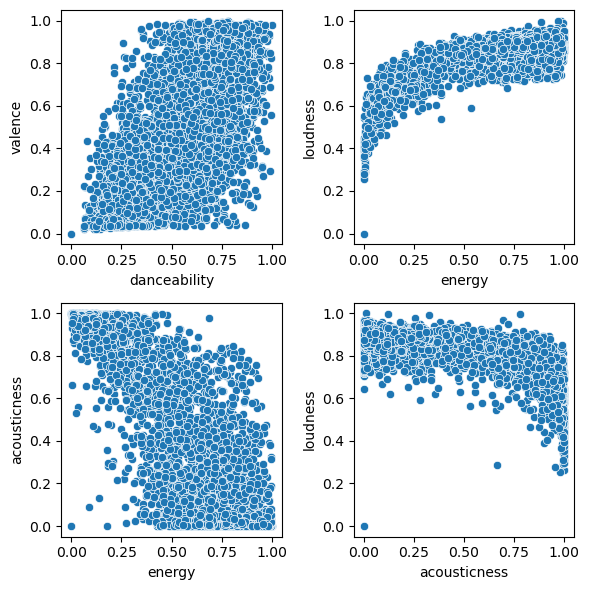

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def corr_plot(ax, feature1, feature2):
    return sns.scatterplot(data=songs_scaled, x=feature1, y=feature2, ax=ax)

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(6, 6))

# Generate the four plots using corr_plot() and assign them to the subplots
corr_plot(axes[0, 0], 'danceability', 'valence')

corr_plot(axes[0, 1], 'energy', 'loudness')

corr_plot(axes[1, 0], 'energy', 'acousticness')

corr_plot(axes[1, 1], 'acousticness', 'loudness')

# Adjust the spacing between subplots
fig.tight_layout()

# Display the plots
plt.show()


## PCA Acousticness, Loudness and energy
Given the results above we apply PCA for 'energy', 'loudness', 'acousticness' and for 'danceability', 'valence'

In [8]:
# make df with the three features we want to PCA
loudness_corr_features = songs_scaled[['energy', 'loudness', 'acousticness']].copy()
dance_corr_features = songs_scaled[['danceability', 'valence']].copy()

# dropping columns that will be merged in PCA
songs_scaled.drop(['valence', 'energy', 'acousticness'], axis=1, inplace=True)


In [9]:
#  set configuration to pandas and importy library
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output="pandas")

# initialize PCA for covering 90% of variance
pca = PCA(n_components=0.9)
# initialize PCA for one column
pca1 = PCA(n_components=1)

df_pca0 = pca.fit_transform(loudness_corr_features)
df_pca1 = pca1.fit_transform(dance_corr_features)


In [10]:
#rename appropriately the new columns
songs_scaled['loudness'] = df_pca0['pca0']
songs_scaled['danceability'] = df_pca1['pca0']
songs_scaled.head()


,,danceability,loudness,speechiness,instrumentalness,liveness,tempo
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,-0.023352,0.564610,0.076797,0.000060,0.987842,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.346032,0.106964,0.037691,0.000002,0.108409,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.586512,0.085489,0.377996,0.000064,0.125633,0.437862
Mulher Eu Sei,Chico César,0.184532,0.849554,0.051307,0.000041,0.391084,0.499098
Rosa Morena,Kurt Elling,0.051426,0.841555,0.041394,0.000348,0.105370,0.565171


# Clustering

In [11]:
# prepare the data
songs_clean = MinMaxScaler().set_output(
    transform='pandas').fit_transform(songs_scaled)
songs_clean.head()


,,danceability,loudness,speechiness,instrumentalness,liveness,tempo
name,artist,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.471557,0.680935,0.076797,0.000060,0.987842,0.515800
Saudade De Bahia,Antônio Carlos Jobim,0.739447,0.375789,0.037691,0.000002,0.108409,0.584322
"Canta Canta, Minha Gente",Martinho Da Vila,0.913851,0.361470,0.377996,0.000064,0.125633,0.437862
Mulher Eu Sei,Chico César,0.622322,0.870929,0.051307,0.000041,0.391084,0.499098
Rosa Morena,Kurt Elling,0.525788,0.865595,0.041394,0.000348,0.105370,0.565171


## Determination of the ideal number of clusters with Elbows & Silhouettes

### Elbow plot

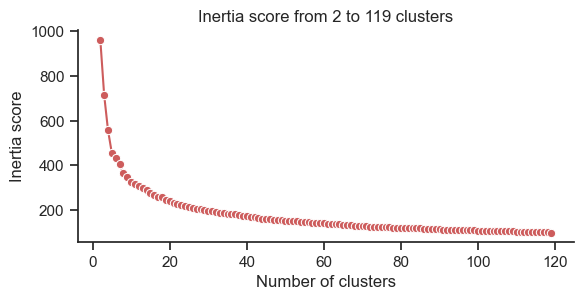

In [12]:
import seaborn as sns
from sklearn.cluster import KMeans
inertia_list_test = []

for i in range(2, 120):
    kmeans_iter = KMeans(n_clusters=i, random_state=123, n_init='auto')
    kmeans_iter.fit(songs_clean)
    inertia_list_test.append(kmeans_iter.inertia_)


custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
(sns.relplot(kind='line', x=range(2, 120), y=inertia_list_test, marker='o', height=3, aspect=2, color = "indianred")
    .set(title=f"Inertia score from 2 to 119 clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
 )

plt.savefig("elbow_full.png", transparent=True, bbox_inches='tight')

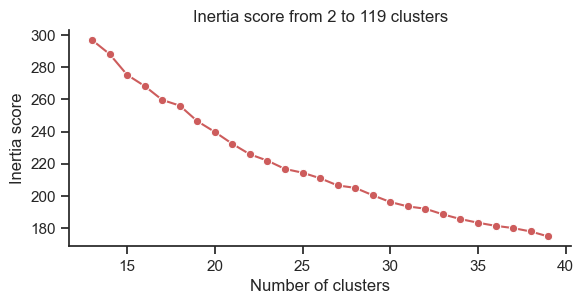

In [37]:
#restrict the x.axis
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
(sns.relplot(kind='line', x=range(13, 40), y=inertia_list_test[11:38], marker='o', height=3, aspect=2, color = "indianred")
    .set(title=f"Inertia score from 2 to 119 clusters")
    .set_axis_labels("Number of clusters", "Inertia score")
 )

import matplotlib.pyplot as plt
plt.savefig("elbow.png", transparent=True, bbox_inches='tight')

### Silhouette

In [14]:
from sklearn.metrics import silhouette_score

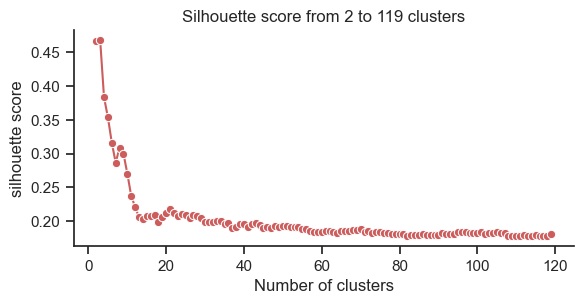

In [15]:
silhouette_list2 = []

for i in range(2, 120):
    loop_kmeans = KMeans(n_clusters=i, random_state=123, n_init='auto')
    loop_kmeans.fit(songs_clean)
    loop_clusters = loop_kmeans.predict(songs_clean)
    silhouette_list2.append(silhouette_score(songs_clean, loop_clusters))

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
(sns.relplot(kind='line', x=range(2, 120), y=silhouette_list2, marker='o', height=3, aspect=2, color = "indianred")
    .set(title=f"Silhouette score from 2 to 119 clusters")
    .set_axis_labels("Number of clusters", "silhouette score")
 )

plt.savefig("silhouette_full.png", transparent=True, bbox_inches='tight')

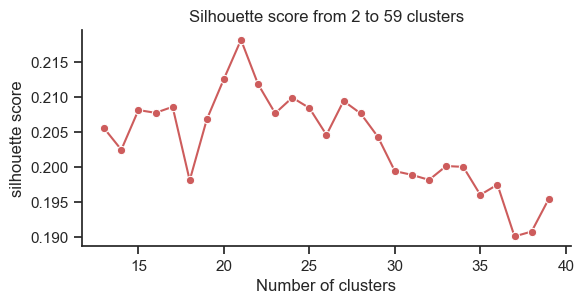

In [38]:
import matplotlib.pyplot as plt

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
(sns.relplot(kind='line', x=range(13, 40), y=silhouette_list2[11:38], marker='o', height=3, aspect=2, color = "indianred")
    .set(title=f"Silhouette score from 2 to 59 clusters")
    .set_axis_labels("Number of clusters", "silhouette score")
 )
# Save the image with transparent background
plt.savefig("silhouette.png", transparent=True, bbox_inches='tight')

# KMeans

In [17]:
from sklearn.cluster import KMeans
df_kmeans = KMeans(n_clusters=21, random_state=123)
songs_final = df_kmeans.fit_predict(songs_clean)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
#create column with cluster in the scaled dataframe
songs_clean['cluster'] = songs_final
songs_clean.head()

,,danceability,loudness,speechiness,instrumentalness,liveness,tempo,cluster
name,artist,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.471557,0.680935,0.076797,0.000060,0.987842,0.515800,15
Saudade De Bahia,Antônio Carlos Jobim,0.739447,0.375789,0.037691,0.000002,0.108409,0.584322,9
"Canta Canta, Minha Gente",Martinho Da Vila,0.913851,0.361470,0.377996,0.000064,0.125633,0.437862,14
Mulher Eu Sei,Chico César,0.622322,0.870929,0.051307,0.000041,0.391084,0.499098,20
Rosa Morena,Kurt Elling,0.525788,0.865595,0.041394,0.000348,0.105370,0.565171,20


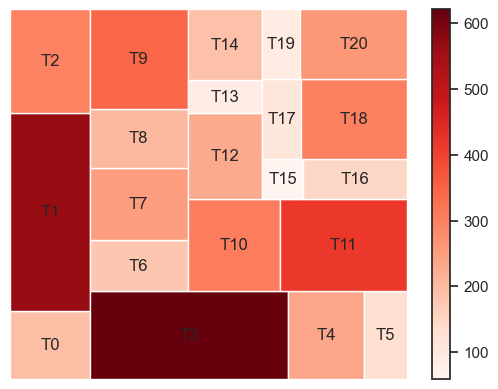

In [19]:
### Treemap of the clusters

import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

population_clusters = [194, 565, 297, 621, 238, 133, 179, 251, 206, 346, 305, 415, 230, 87, 189, 59, 149, 111, 303, 94, 263]

# Generate labels using the index of population_clusters
labels = [f"T{i}" for i in range(len(population_clusters))]

# Define a color map
cmap = cm.get_cmap('Reds')

# Normalize the data to map it to the range [0, 1]
normalize = colors.Normalize(vmin=min(population_clusters), vmax=max(population_clusters))

# Generate colors based on the normalized values
colors = [cmap(normalize(value)) for value in population_clusters]

# Plot the treemap with labels and color gradient
squarify.plot(sizes=population_clusters, label=labels, color=colors)
plt.axis("off")

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_title('')

# Save the image with transparent background
plt.savefig("treemap.png", transparent=True, bbox_inches='tight')

plt.show()


## Cluster exploration

In [20]:
#Add cluster column to original df
songs['cluster'] = songs_clean['cluster']

### Clusters heatmap

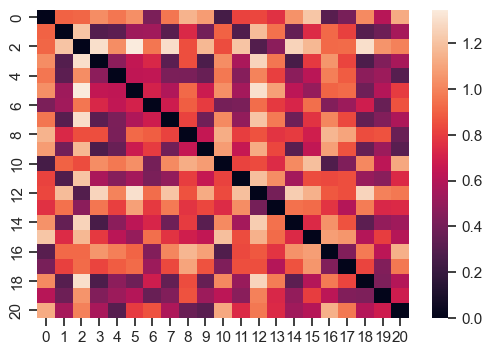

In [21]:
# We compute the centroids
centroids = df_kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids)

# we compute the pairwise distances
centroid_dist = pd.DataFrame(pairwise_distances(centroids),
                             index=centroids_df.index,
                             columns=centroids_df.index)

# we compute the heatmap
plt.subplots(figsize=(6, 4))
sns.heatmap(centroid_dist)

plt.savefig("heatmap.png", transparent=True, bbox_inches='tight')

In [22]:
#Distant clusters
centroid_dist_true = centroid_dist.applymap(
    lambda x: (x >= 0.8))

true_count_cluster = centroid_dist_true.astype(bool).sum().sum()

# Display the count
print("The ", (true_count_cluster/(21*21))*100,"% of pairs are >0.8 distant")


#The code below is for both close and far
#centroid_dist_true = centroid_dist.applymap(
#    lambda x: (0.0 < x <= 0.2) or (x >= 1.2))

#true_count_cluster = centroid_dist_true.astype(bool).sum().sum()


The  47.61904761904761 % of pairs are >0.8 distant


## Plotting

In [23]:
# Plotting the distribution of an individual features across different clusters.
# groupby
songs.head()
songs_explore = songs.drop(
    ['key', 'mode', 'time_signature', 'id', 'html', 'type'], axis=1)
songs_explore.groupby('cluster').mean()


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
cluster,,,,,,,,,,
0,0.255028,0.897639,-8.388196,0.098598,0.003396,0.844160,0.132199,0.220682,152.579258,268985.329897
1,0.587547,0.756743,-5.683467,0.058776,0.075122,0.009983,0.144956,0.400013,119.229890,229874.304425
2,0.259169,0.103937,-23.654411,0.044525,0.944835,0.868606,0.124359,0.106781,78.482902,379522.595960
3,0.741948,0.752440,-6.171201,0.062696,0.100510,0.008746,0.103677,0.774412,113.555348,220077.758454
4,0.494840,0.494021,-8.903794,0.044771,0.460393,0.013454,0.148123,0.344647,125.002828,253078.550420
5,0.541812,0.842368,-5.471030,0.115852,0.078766,0.017619,0.660917,0.425937,128.116474,250379.383459
6,0.280615,0.897318,-7.963838,0.108161,0.007662,0.463313,0.189084,0.196798,118.851788,277151.765363
7,0.585394,0.745088,-6.023980,0.141899,0.157408,0.005769,0.149846,0.661920,171.636964,212382.940239
8,0.362802,0.163315,-16.725044,0.042671,0.907549,0.049178,0.154755,0.197801,104.959553,266945.966019


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_vs_cluster(feature, df):
    # comput max and min of feature
    feature_min = df[feature].min()
    feature_max = df[feature].max()

    # compute the range of feature
    feature_range = feature_max - feature_min

    # compute 20% and 80% of range
    y_20_percent = feature_min + 0.2 * feature_range
    y_80_percent = feature_min + 0.8 * feature_range

    # colors of bars
    colors = ["salmon" if val > y_20_percent and val < y_80_percent else "darkred" if val <= y_20_percent else "darkred" for val in df[feature]]

    ax = sns.barplot(data=df, x="cluster", y=feature, palette=colors)

    # horizontal line at 20%
    ax.axhline(y=y_20_percent, color="black", linestyle="--")

    # horizontal line at 80%
    ax.axhline(y=y_80_percent, color="black", linestyle="--")
    
    
    plt.savefig(f"{feature}_clusters.png", transparent=True, bbox_inches='tight')
    return ax


<AxesSubplot:xlabel='cluster', ylabel='danceability'>

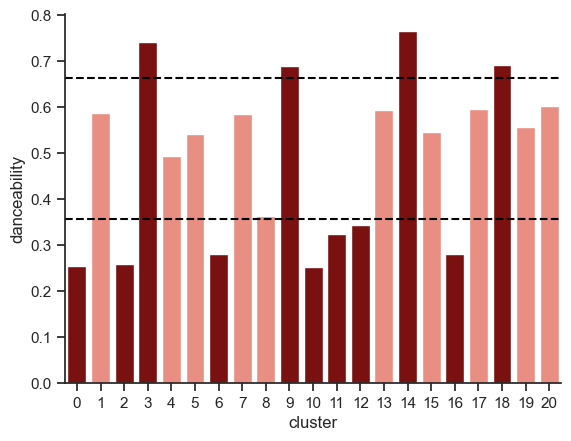

In [25]:
#denceability
plot_vs_cluster("danceability",songs_explore.groupby('cluster').mean().reset_index())

<AxesSubplot:xlabel='cluster', ylabel='loudness'>

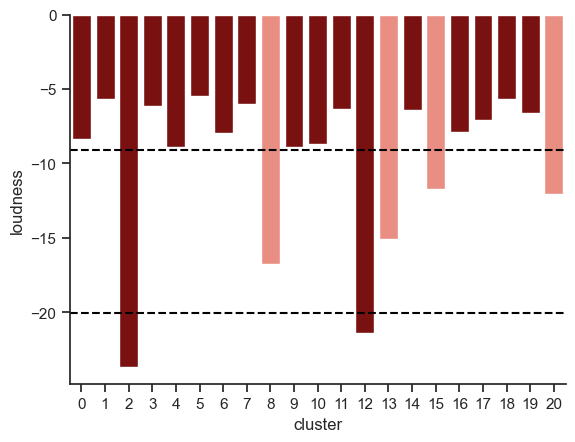

In [26]:
#loudness
plot_vs_cluster('loudness', songs_explore.groupby('cluster').mean().reset_index())

<AxesSubplot:xlabel='cluster', ylabel='speechiness'>

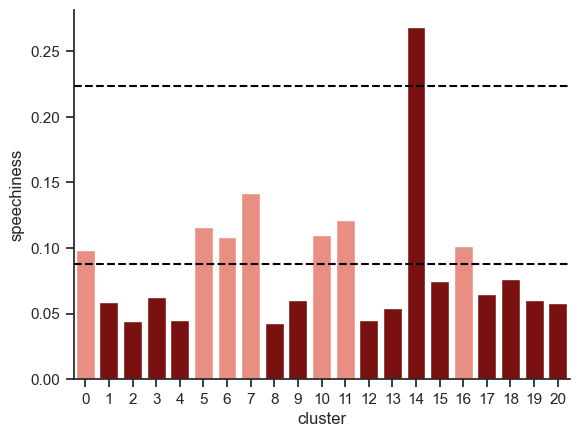

In [27]:
#speechiness
plot_vs_cluster('speechiness', songs_explore.groupby('cluster').mean().reset_index())



<AxesSubplot:xlabel='cluster', ylabel='instrumentalness'>

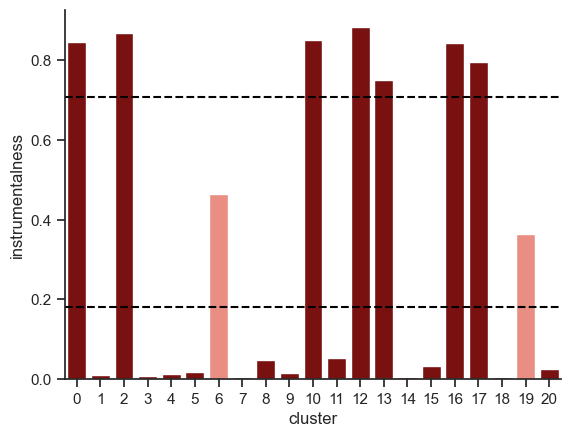

In [28]:
#instrumentalness
plot_vs_cluster('instrumentalness', songs_explore.groupby('cluster').mean().reset_index())



<AxesSubplot:xlabel='cluster', ylabel='liveness'>

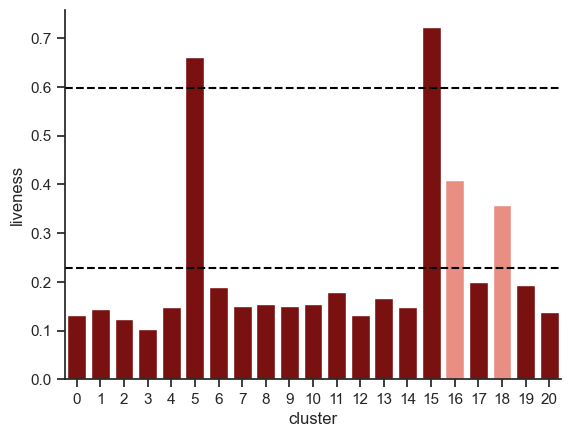

In [29]:
#liveness
plot_vs_cluster('liveness', songs_explore.groupby('cluster').mean().reset_index())



<AxesSubplot:xlabel='cluster', ylabel='tempo'>

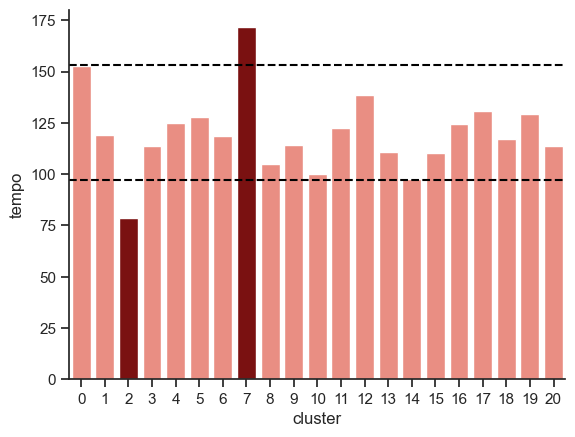

In [30]:
#tempo
plot_vs_cluster('tempo', songs_explore.groupby('cluster').mean().reset_index())



<AxesSubplot:xlabel='cluster', ylabel='duration_ms'>

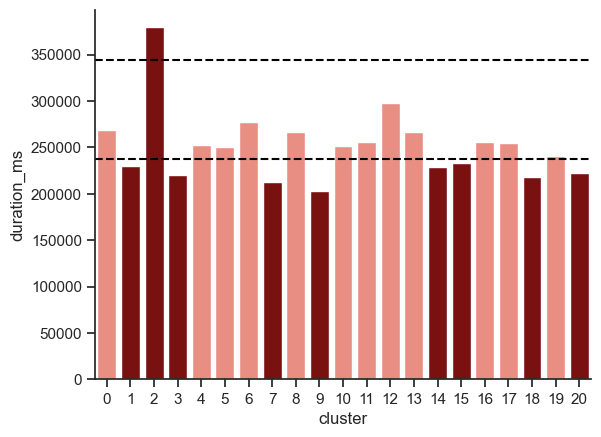

In [31]:
#duration_ms
plot_vs_cluster('duration_ms', songs_explore.groupby('cluster').mean().reset_index())

### Detecting telling features

In [32]:
def telling_features(df):
        
   #number of clusters
    n_clusters = df.shape[0]
   
    #compute 20% and 80%
    twenty = {}
    eighty = {}
    
    for feature in df.columns:
        twenty[feature] = 0.2 * (df[feature].max() - df[feature].min())
        eighty[feature] = 0.8 * (df[feature].max() - df[feature].min())

    #append to the dataframe
    df = df.append([twenty,eighty], ignore_index=True)
    
    for cluster in range(n_clusters):
        string_cluster = f'I have cluster {cluster} of songs with the following characteristics: '
        for feature in df.columns:
            if df.loc[cluster,feature] < df.loc[21,feature]:
                df.loc[cluster,feature] = "⬇️"
                string_cluster += f"{feature} is low, " 
            elif df.loc[cluster,feature] > df.loc[22,feature]:
                df.loc[cluster,feature] = "⬆️"
                string_cluster += f"{feature} is high, " 
            else:
                df.loc[cluster,feature] = "-"
        string_cluster += " Give me max three possible names for this cluster which is supposed to represent Spotify playlist. " 
        print(string_cluster)
        print("")
    
    return df

In [33]:
telling_features(songs_explore.groupby('cluster').mean()).drop(["energy","acousticness","valence"],axis=1)

I have cluster 0 of songs with the following characteristics: energy is high, loudness is low, acousticness is low, instrumentalness is high, tempo is high, duration_ms is high,  Give me max three possible names for this cluster which is supposed to represent Spotify playlist. 

I have cluster 1 of songs with the following characteristics: danceability is high, energy is high, loudness is low, acousticness is low, instrumentalness is low, tempo is high, duration_ms is high,  Give me max three possible names for this cluster which is supposed to represent Spotify playlist. 

I have cluster 2 of songs with the following characteristics: energy is low, loudness is low, speechiness is low, acousticness is high, instrumentalness is high, valence is low, tempo is high, duration_ms is high,  Give me max three possible names for this cluster which is supposed to represent Spotify playlist. 

I have cluster 3 of songs with the following characteristics: danceability is high, energy is high, lou

/var/folders/_d/423mlwpd6h5c2sqfcynjvjgw0000gp/T/ipykernel_8240/596243959.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([twenty,eighty], ignore_index=True)


,danceability,loudness,speechiness,instrumentalness,liveness,tempo,duration_ms
0,-,⬇️,-,⬆️,-,⬆️,⬆️
1,⬆️,⬇️,-,⬇️,-,⬆️,⬆️
2,-,⬇️,⬇️,⬆️,-,⬆️,⬆️
3,⬆️,⬇️,-,⬇️,⬇️,⬆️,⬆️
4,⬆️,⬇️,⬇️,⬇️,-,⬆️,⬆️
5,⬆️,⬇️,-,⬇️,⬆️,⬆️,⬆️
6,-,⬇️,-,-,-,⬆️,⬆️
7,⬆️,⬇️,-,⬇️,-,⬆️,⬆️
8,-,⬇️,⬇️,⬇️,-,⬆️,⬆️
9,⬆️,⬇️,-,⬇️,-,⬆️,⬆️


### Treemap of the clusters

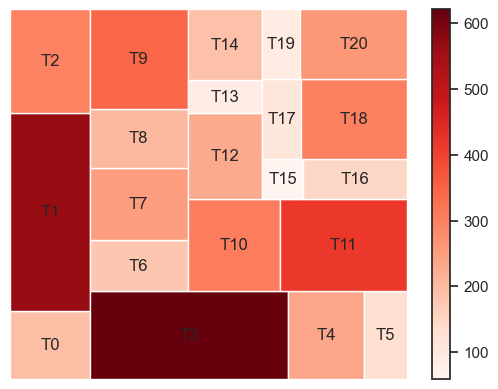

In [34]:
import squarify
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

population_clusters = [194, 565, 297, 621, 238, 133, 179, 251, 206, 346, 305, 415, 230, 87, 189, 59, 149, 111, 303, 94, 263]

# Generate labels using the index of population_clusters
labels = [f"T{i}" for i in range(len(population_clusters))]

# Define a color map
cmap = cm.get_cmap('Reds')

# Normalize the data to map it to the range [0, 1]
normalize = colors.Normalize(vmin=min(population_clusters), vmax=max(population_clusters))

# Generate colors based on the normalized values
colors = [cmap(normalize(value)) for value in population_clusters]

# Plot the treemap with labels and color gradient
squarify.plot(sizes=population_clusters, label=labels, color=colors)
plt.axis("off")

# Add colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.ax.set_title('')

# Save the image with transparent background
plt.savefig("treemap.png", transparent=True, bbox_inches='tight')

plt.show()
